In [9]:
import pandas as pd
dia_data = pd.read_csv('diabetes.csv')
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
dia_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("diabetes.csv")

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

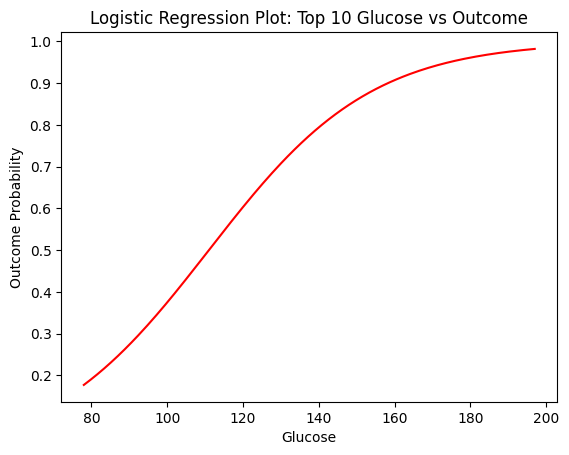

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

top10 = df.head(10)
X = top10['Glucose'].values.reshape(-1, 1)
y = top10['Outcome'].values

# Fit logistic regression
model = LogisticRegression()
model.fit(X, y)

# Smooth curve data
X_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]

# Logistic regression curve only (no scatter points)
sns.lineplot(x=X_range.flatten(), y=y_prob, color="red")

plt.xlabel("Glucose")
plt.ylabel("Outcome Probability")
plt.title("Logistic Regression Plot: Top 10 Glucose vs Outcome")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("diabetes.csv")
X = df.drop("Outcome", axis=1)
Y = df["Outcome"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, Y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [9]:
Y_pred = logreg.predict(X_test)


In [10]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", cnf_matrix)


Confusion Matrix:
 [[78 21]
 [18 37]]


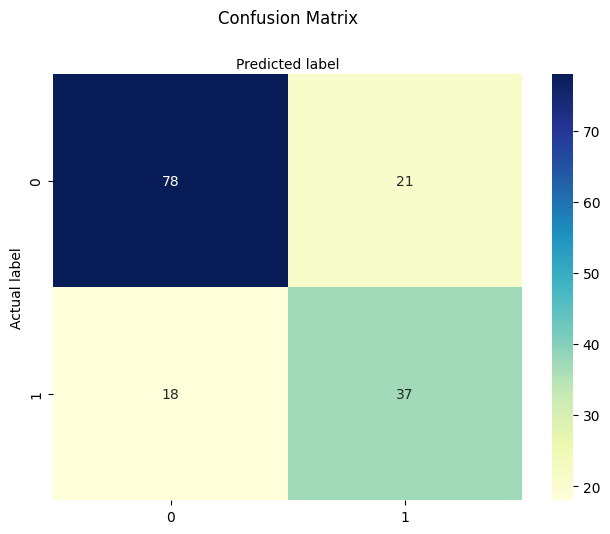

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)

class_names = [0, 1]  

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")

plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()


In [16]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(Y_test, Y_pred, target_names=target_names))


                  precision    recall  f1-score   support

without diabetes       0.81      0.79      0.80        99
   with diabetes       0.64      0.67      0.65        55

        accuracy                           0.75       154
       macro avg       0.73      0.73      0.73       154
    weighted avg       0.75      0.75      0.75       154



In [12]:
from sklearn import metrics

accuracy = metrics.accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7467532467532467


In [13]:
from sklearn import metrics
precision = metrics.precision_score(Y_test,Y_pred)
print("precision:", precision)

precision: 0.6379310344827587


In [14]:
from sklearn import metrics
recall = metrics.recall_score(Y_test,Y_pred)
print("recall:", recall)

recall: 0.6727272727272727


In [15]:
from sklearn import metrics
f1 = metrics.f1_score(Y_test,Y_pred)
print("f1-score:", f1)

f1-score: 0.6548672566371682
